<a href="https://colab.research.google.com/github/LcsGondra/Bloco-Dados/blob/master/Lucas_Gondra_AT(LifeCycle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
from sklearn.datasets import load_digits as dataset
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score, adjusted_rand_score, f1_score

In [79]:
digits = dataset(as_frame=True)
# df = pd.DataFrame(data=np.c_[digits['data'], digits['target']], columns=digits['feature_names'] + digits['target_names'])
digits.data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [80]:
digits.target

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [88]:
X, y = digits.data, digits.target
print(X, y)

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0           0.0        0.0      

In [89]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [107]:
train_accuracies = []
test_accuracies = []
cv_accuracies = []

neighbors_settings = range(1, 20)

In [108]:
for n in neighbors_settings:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)

  knn_pred_train_y = knn.predict(X_train)
  knn_pred_test_y = knn.predict(X_test)

  train_accuracies.append(accuracy_score(y_train, knn_pred_train_y))
  test_accuracies.append(accuracy_score(y_test, knn_pred_test_y))

  cv_scores = cross_val_score(knn, X, y, cv=5)
  cv_accuracies.append(np.mean(cv_scores))


In [61]:
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.97      0.95        36
           2       0.90      1.00      0.95        35
           3       1.00      0.97      0.99        37
           4       0.97      0.94      0.96        36
           5       1.00      1.00      1.00        37
           6       0.97      1.00      0.99        36
           7       0.95      0.97      0.96        36
           8       0.97      0.89      0.93        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

K-Nearest Neighbors Accuracy: 0.9666666666666667


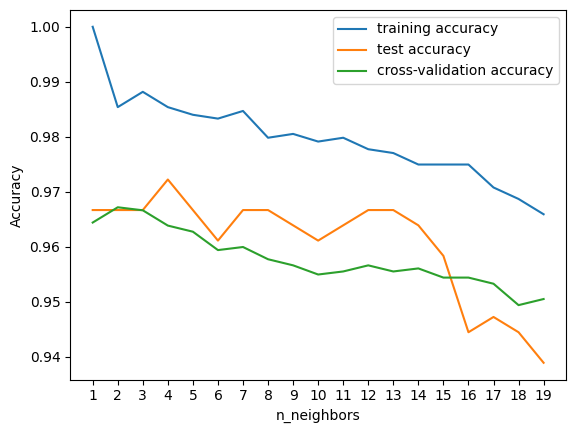

In [109]:
plt.plot(neighbors_settings, train_accuracies, label="training accuracy")
plt.plot(neighbors_settings, test_accuracies, label="test accuracy")
plt.plot(neighbors_settings, cv_accuracies, label="cross-validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.xticks(range(1,20))
plt.legend()

In [111]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32)
# Fit transform
X_pca = pca.fit_transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (1797, 64)
Reduced shape: (1797, 32)


In [112]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=64)
x_pca_tsne = tsne.fit_transform(X_pca)

In [113]:
X_train_pca_tsne, X_test_pca_tsne = train_test_split(x_pca_tsne, test_size=0.2, random_state=42, stratify=y)

In [130]:
param_grid = {'n_clusters': range(2, 15)}
kmeans = KMeans(random_state=42)
grid_search = GridSearchCV(kmeans, param_grid, cv=5, scoring='adjusted_rand_score')
grid_search.fit(x_pca_tsne, y)

# Append ARI scores for each configuration
cv_kmeans_ari_scores = grid_search.cv_results_['mean_test_score']

# Print the best ARI score and its corresponding parameters
print("\nBest K-Means Clustering Adjusted Rand Index:", grid_search.best_score_)
print("Best K-Means parameters:", grid_search.best_params_)

# Step 7: Train the best K-Means model and evaluate
best_kmeans = grid_search.best_estimator_
y_pred_kmeans = best_kmeans.fit_predict(X_test_pca_tsne)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8


Best K-Means Clustering Adjusted Rand Index: 0.8360717084942297
Best K-Means parameters: {'n_clusters': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [131]:
print(cv_kmeans_ari_scores)

[0.16825638 0.2539174  0.37371987 0.43892362 0.55019106 0.57722594
 0.70468251 0.78302778 0.83607171 0.82327269 0.79889861 0.7800576
 0.76783669]



K-Means Clustering Adjusted Rand Index: 0.782170628335349

K-Means Clustering Cross-Validated Adjusted Rand Index: 0.6043139894110294


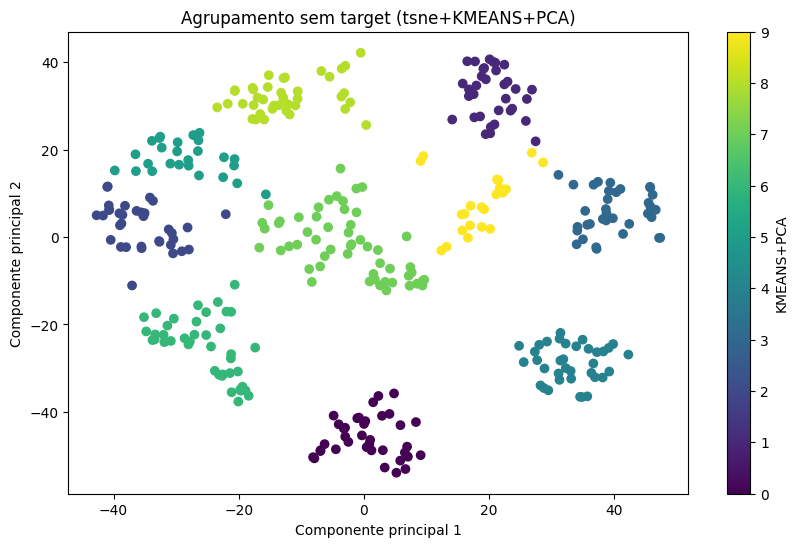

In [132]:
print("\nK-Means Clustering Adjusted Rand Index:", adjusted_rand_score(y_test, y_pred_kmeans))
print("\nK-Means Clustering Cross-Validated Adjusted Rand Index:", np.mean(cv_kmeans_ari_scores))

plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca_tsne[:, 0], X_test_pca_tsne[:, 1], c=y_pred_kmeans, cmap='viridis')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Agrupamento sem target (tsne+KMEANS+PCA)')
plt.colorbar(label='KMEANS+PCA')
plt.show()